# Chapter 8 Natural language processing

> **Learning outcomes:**
> - Represent text data in structured and easy-to-consume formats for machine learning and text mining.
> - Perform sentence classifcation tasks on text data.
> - Identify important keywords for sentence classification.

In this chapter, we will explore how Natural Language Processing (NLP) can be applied in the finance industry. We will discuss various use cases, such as sentiment analysis, financial news summarization, and chatbots for customer service. We will also provide real-life Python code examples to help you better understand the application of NLP in finance.

## 8.1 Introduction to Natural Language Processing
Natural Language Processing (NLP) is a subfield of AI that focuses on the interaction between computers and human languages. It involves the development of algorithms and models that can understand, interpret, and generate human language in a manner that is both meaningful and useful.

NLP has numerous applications in the finance industry, including:

Sentiment Analysis: Analyzing the sentiment of news articles, social media posts, and other text data to gauge market sentiment and predict its impact on stock prices.
Financial News Summarization: Automatically summarizing financial news articles to provide concise and relevant information for decision-making.
Chatbots: Developing AI-powered chatbots to handle customer service inquiries, provide investment advice, or execute trades.
In the following sections, we will discuss how NLP techniques can be applied in various finance use cases and provide Python code examples to illustrate these concepts.

## 8.2 Sentiment Analysis for Finance
Sentiment analysis, also known as opinion mining, is an NLP technique used to determine the sentiment or emotion expressed in a piece of text. In finance, sentiment analysis can be used to gauge market sentiment and predict its impact on stock prices or other financial instruments.

### 8.2.1 Sentiment Analysis with VADER
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. In this example, we will use the VADER library to analyze the sentiment of financial news headlines.

Valence Aware Dictionary and sEntiment Reasoner (VADER) is a lexicon and rule-based sentiment analysis tool developed by C.J. Hutto and Eric Gilbert. It is specifically designed for analyzing sentiments expressed in social media, where the language can be more informal, and the context can be quite different compared to formal texts.

VADER's key components include:

VADER Lexicon: The VADER lexicon is a curated list of words, each of which is assigned a sentiment score based on human judgments. The sentiment scores range from -4 (extremely negative) to 4 (extremely positive), with 0 being neutral. The lexicon also considers sentiment intensity (e.g., "good" vs. "excellent") and includes common emoticons, acronyms, and slang terms that are often used in social media.

Heuristic Rules: VADER incorporates a set of heuristic rules to account for various linguistic nuances that affect sentiment interpretation. These rules consider factors such as negations, intensifiers, and the effects of punctuation and capitalization on sentiment intensity.

Here's an overview of some of the heuristic rules employed by VADER:

- Negation Handling: VADER can detect negations in the text, which can reverse the sentiment polarity of a given word or phrase (e.g., "not good" has a negative sentiment instead of positive).
- Intensity Modifiers: VADER recognizes words that can modify the intensity of a sentiment (e.g., "very good" is more positive than "good").
- Contrastive Conjunctions: VADER accounts for contrastive conjunctions (e.g., "but") that can change the sentiment polarity of a sentence (e.g., "The movie was great, but the ending was terrible.").
- Punctuation and Capitalization: VADER takes into account the effects of punctuation and capitalization on sentiment intensity. For example, an exclamation mark can amplify the intensity of a sentiment, while using all capital letters can indicate a stronger sentiment (e.g., "WOW" vs. "wow").

VADER processes a given text by tokenizing it into words and phrases, and then calculates a sentiment score for each token based on the lexicon. The heuristic rules are applied to adjust the sentiment scores as needed. Finally, VADER computes the overall sentiment polarity by aggregating the sentiment scores of individual tokens.

VADER's output includes the following sentiment metrics:

- Positive: The proportion of the text that has a positive sentiment.
- Negative: The proportion of the text that has a negative sentiment.
- Neutral: The proportion of the text that has a neutral sentiment.
- Compound: A single sentiment score that ranges from -1 (extremely negative) to 1 (extremely positive), representing the overall sentiment polarity of the text.

It's important to note that VADER is a rule-based sentiment analysis tool and does not use machine learning techniques or require training on labeled data. As a result, it may not be as effective in some contexts or domains that have specific language nuances that VADER's lexicon and heuristic rules do not cover. However, it is particularly useful for sentiment analysis in social media or informal text settings, where traditional machine learning models may struggle with the informal language and context.

In [2]:
# Import necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

headlines = [
    "Apple Inc. announces record-breaking Q4 earnings, driven by strong iPhone sales.",
    "AAPL stock soars following successful launch of the new MacBook Pro.",
    "Apple's iOS 15.2 update brings groundbreaking privacy features and performance improvements.",
    "Rumors suggest Apple is working on a new augmented reality headset to be released in 2024.",
    "AAPL faces supply chain challenges amid global chip shortage but remains optimistic for the future.",
    "Apple expands its presence in the renewable energy sector with a new solar farm partnership.",
    "Analysts predict Apple's services revenue to double by 2026, as App Store and Apple Music continue to grow.",
    "Apple wins patent lawsuit against a major competitor, further solidifying its position in the smartphone market.",
    "Apple Inc. invests in groundbreaking battery technology to extend the life of its devices.",
    "The latest iPad Pro garners rave reviews, showcasing Apple's innovation in the tablet market.",
]
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze the sentiment of the headlines
sentiments = []
for headline in headlines:
    sentiment_score = analyzer.polarity_scores(headlines)
    sentiments.append(sentiment_score['compound'])

# Calculate the average sentiment
average_sentiment = sum(sentiments) / len(sentiments)
print(f"Average Sentiment: {average_sentiment:.4f}")

Average Sentiment: 0.9555


## 8.3 Financial News Summarization
Automatically summarizing financial news articles can help provide concise and relevant information for decision-making. NLP techniques, such as extractive and abstractive summarization, can be used to generate summaries of financial news articles.

### 8.3.1 Extractive Summarization
Extractive summarization involves selecting the most important sentences from the original text to create a summary. One common approach to extractive summarization is the TextRank algorithm, which is based on the PageRank algorithm used by Google Search.

In this example, we will use the bert-extractive-summarizer library's implementation of extractive summarizer to summarize a sample financial news article.

First, you will need to install the transformer, torch library if you haven't already:

In [3]:

!pip install --quiet bert-extractive-summarizer transformers sentencepiece torch


# Sample financial news article
article = '''
Apple Inc., the Cupertino-based multinational technology company, has yet again demonstrated its dominance in the technology sector by announcing record-breaking earnings for the fourth quarter, driven by robust iPhone sales and impressive performance across all its business segments. The company's quarterly revenue reached an all-time high of $111.4 billion, marking a 21% increase year-over-year and the first time Apple's quarterly revenue has surpassed the $100 billion milestone. Earnings per share came in at a remarkable $1.68, significantly exceeding analysts' expectations of $1.41 per share.

The iPhone business segment emerged as the primary catalyst for Apple's Q4 success, boasting a 17% increase in revenue compared to the same period last year. This growth can be attributed to the strong demand for the iPhone 13, which has been well-received by consumers worldwide for its advanced features, enhanced battery life, and improved camera capabilities.

In addition to its flagship product, Apple also experienced substantial growth in other business segments. The Wearables, Home, and Accessories segment, which includes the popular Apple Watch and AirPods product lines, reported a 30% increase in revenue. Meanwhile, the Services segment, encompassing offerings such as Apple Music, iCloud, and the App Store, saw a 24% increase in revenue.

Apple's Mac and iPad segments also performed exceedingly well, with revenue growth of 21% and 41%, respectively. This success can be attributed to the increasing demand for remote work and education solutions, which has spurred consumers to invest in high-quality computing devices and tablets to meet their productivity needs.

Despite ongoing supply chain challenges due to the global chip shortage, Apple remains optimistic about its future. The company has ramped up investments in its supply chain, working closely with suppliers to mitigate the impacts of the shortage. During the earnings call, Apple CEO Tim Cook expressed confidence in the company's ability to navigate these challenges, stating that he expects the supply chain issues to improve in the coming months.

Looking ahead, Apple's strategic focus is on expanding its services business and exploring new, cutting-edge technologies to maintain its competitive edge. The company has invested in groundbreaking battery technology that promises to revolutionize the electric vehicle industry, fueling speculation about Apple's rumored "Project Titan" electric car. Additionally, Apple is said to be working on an augmented reality (AR) headset, expected to be released in 2024, which could potentially redefine the way users interact with digital content.

In conclusion, Apple's continued innovation, strong performance across all business segments, and unwavering commitment to addressing supply chain challenges paint a promising picture for the company's future. As the technology giant continues to push the boundaries of what is possible, it is clear that Apple remains a force to be reckoned with in the ever-evolving technology landscape.
'''

from summarizer import Summarizer

model = Summarizer()
summary = model(article, num_sentences=3)


Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


```
Apple Inc., the Cupertino-based multinational technology company, has yet again demonstrated its dominance in the technology sector by announcing record-breaking earnings for the fourth quarter, driven by robust iPhone sales and impressive performance across all its business segments. During the earnings call, Apple CEO Tim Cook expressed confidence in the company's ability to navigate these challenges, stating that he expects the supply chain issues to improve in the coming months. As the technology giant continues to push the boundaries of what is possible, it is clear that Apple remains a force to be reckoned with in the ever-evolving technology landscape.
```

In this example, we provide a sample financial news article about Apple Inc.'s Q4 earnings as a string. The summarize function from the bert library takes the input article and a ratio parameter, which determines the number of sentences to include in the summary. 

### 8.3.2 Abstractive Summarization
Abstractive summarization aims to generate a summary that captures the main ideas of the original text but may use different wording or phrasing. This often requires a deeper understanding of the text and the ability to generate new sentences. Sequence-to-sequence (seq2seq) models, such as those based on the Transformer architecture, have been shown to be effective for abstractive summarization tasks.

In this example, we will use the transformers library by Hugging Face to generate an abstractive summary of a sample financial news article. First, you will need to install the transformers library if you haven't already:

In [4]:
!pip install transformers --quiet


Next, here's the Python code to perform abstractive





In [5]:
from transformers import pipeline

# Initialize the summarization pipeline
summarizer = pipeline("summarization")

# Summarize the article using an abstractive model
summary = summarizer(article, max_length=100, min_length=25, do_sample=False)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


```
Apple's quarterly revenue reached an all-time high of $111.4 billion, marking a 21% increase year-over-year . Earnings per share came in at a remarkable $1.68, significantly exceeding analysts' expectations . iPhone sales were the primary catalyst for Apple's Q4 success, boasting a 17% increase in revenue compared to the same period last year .
```

In this example, we use the pipeline function from the transformers library to create a summarization pipeline. The pipeline takes the input article and generates an abstractive summary using a pre-trained Transformer model.



## 8.4 Neural network architecture
Now let's elaborate on the seq2seq and Transformer architecture where both Bert and transformers are based on.



## 8.4.1 Sequence-to-Sequence (seq2seq) Models

Sequence-to-sequence models are a type of neural network architecture used for tasks where the input and output are both sequences, such as text translation, summarization, and captioning. The seq2seq model consists of two main components:

- Encoder: The encoder is a neural network, usually a recurrent neural network (RNN) or a Transformer, that processes the input sequence and encodes it into a fixed-size vector representation. The encoder is designed to capture the underlying structure and meaning of the input sequence.

- Decoder: The decoder is another neural network, also usually an RNN or a Transformer, that takes the encoded vector from the encoder and generates the output sequence one token at a time. The decoder is trained to predict the next token in the output sequence, given the encoded input and the previously generated tokens.



## 8.4.2 Transformer Architecture
The Transformer is a type of seq2seq model introduced by Vaswani et al. in the paper "Attention Is All You Need" (2017). It was designed to address the limitations of RNN-based seq2seq models, such as their inherently sequential nature and difficulty in capturing long-range dependencies. The Transformer model is built upon the concept of self-attention, which allows it to weigh the importance of different tokens in the input sequence relative to each other.

The Transformer architecture consists of an encoder and a decoder, each composed of stacked layers of self-attention and feed-forward neural networks. The encoder processes the input sequence and generates a contextualized representation for each token, while the decoder generates the output sequence by attending to both the encoder's output and its own previously generated tokens.

![Alt text](C:/Users/Zheng_/Desktop/Book2/images/chap8/transformer2.jpg)

The Transformer architecture has been shown to be highly effective in various NLP tasks, such as machine translation, summarization, and question answering. Since its introduction, the Transformer has become the basis for many state-of-the-art NLP models, including BERT, GPT, and T5.

For abstractive summarization, pre-trained Transformer models can be fine-tuned on a dataset of news articles and their corresponding summaries. Once trained, the model can generate summaries for new articles by predicting the most likely sequence of output tokens, given the input article's tokens.

## 8.5 Practical text analytics

Text mining combines both machine learning and natural language processing (NLP) to draw meaning from unstructured text documents. Text mining the driving force behind how a business analyst turns 50,000 hotel guest reviews into specific recommendationsm, how a workforce analyst improves productivity and reduces employee turnover and how companies are automating processes using chat bots.

A very popular and current strategy in this field is Vectorized Term Frequency and Inverse Document Frequency (TF-IDF) representation. In fact, google search engine also uses this technique when a word is searched. It is based on unsupervised learning technique. TF-IDF converts your document text into a bag of words and then assigns a weighted term to each word. In this chapter, we will discuss how to use text mining techniques to get meaningful results for text classification.

### 8.5.1 Data preprocessing

In [9]:
import pandas as pd
 
#this assumes one json item per line in json file
df=pd.read_json("TFIDF_news.json", lines=True)

In [10]:
df.dtypes

short_description            object
headline                     object
date                 datetime64[ns]
link                         object
authors                      object
category                     object
dtype: object

In [11]:
#number of rows (datapoints)
len(df)

124989

In [12]:
# Take sample of 3 to view the data
df.sample(3)

,short_description,headline,date,link,authors,category
34779,Like what you read below? Sign up for HUFFPOST...,HUFFPOST HILL - Have *You* Been Injured By A F...,2017-02-10,https://www.huffingtonpost.com/entry/huffpost-...,Eliot Nelson and Jeffrey Young,POLITICS
105022,,How To Be Healthy In Under A Minute,2014-12-03,https://www.huffingtonpost.com/entry/quick-hea...,Mallory Moyer,HEALTHY LIVING
88237,Kurt Cobain's raspy vocals seemed to bellow fr...,'Soaked In Bleach': The Mysterious Death Of Ku...,2015-06-15,https://www.huffingtonpost.com/entry/the-myste...,"Patrick Pitu, ContributorActor, Artist.",ENTERTAINMENT


Articles are between July 2014 and July 2018

<AxesSubplot:>

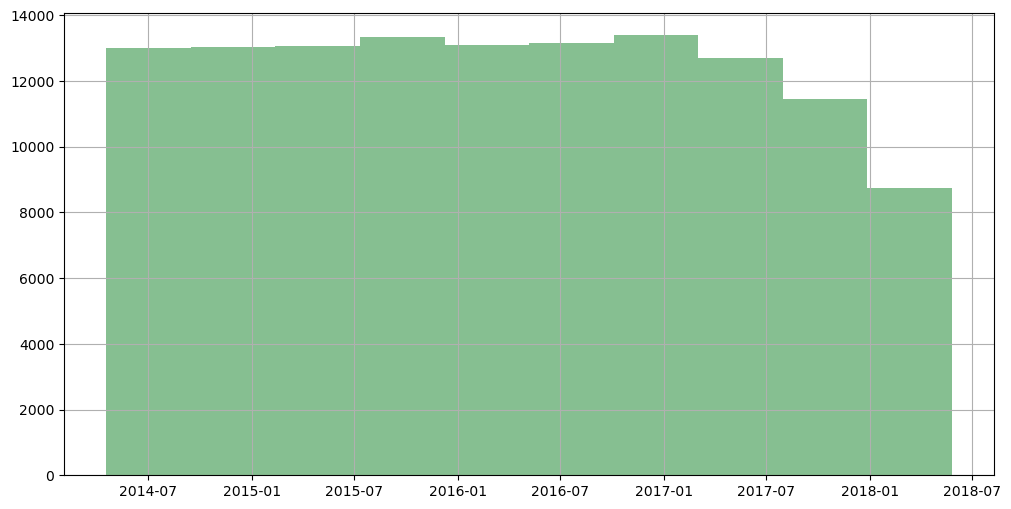

In [13]:
df.date.hist(figsize=(12,6),color='#86bf91',)



In our data, there are a total of 31 categories.

In [14]:
len(set(df['category'].values))

31


Most of the articles are related to politics. Education related articles have the lowest volume.

<AxesSubplot:>

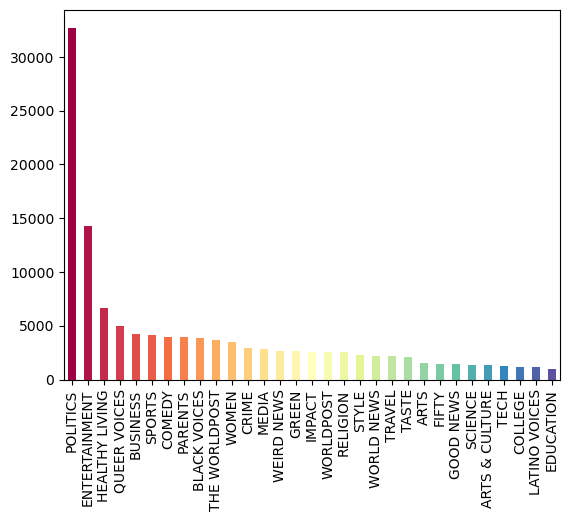

In [15]:
import matplotlib
import numpy as np
cmap = matplotlib.cm.get_cmap('Spectral')
rgba = [cmap(i) for i in np.linspace(0,1,len(set(df['category'].values)))]
df['category'].value_counts().plot(kind='bar',color =rgba)


In our example, we will only use the headline to predict category. Also, we will only be using 2 categories sports and crime for simplicity. Notice that we are using `CRIME` and `COMDEDY` categories from our dataset.

(6864, 6)


<AxesSubplot:>

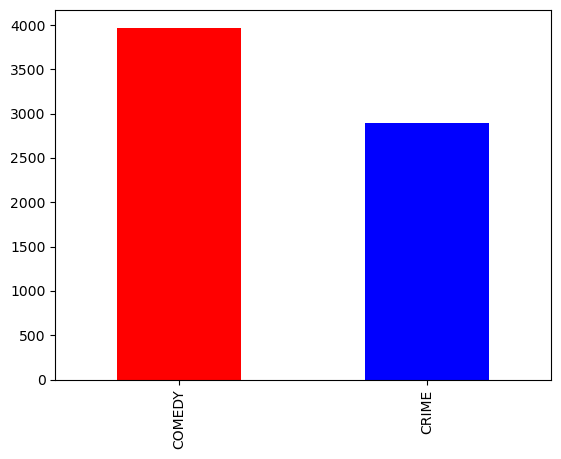

In [16]:
df_orig=df.copy()
df = df_orig[df_orig['category'].isin(['CRIME','COMEDY'])]
print(df.shape)
df.head()
df = df.loc[:, ['headline','category']]
df['category'].value_counts().plot(kind='bar',color =['r','b'])

### 8.5.2 Vectorization methods

Text Vectorization is the process of converting text into numerical representation.

- Binary Term Frequency
- Bag of Words (BoW) Term Frequency
- (L1) Normalized Term Frequency
- (L2) Normalized TF-IDF
- Word2Vec

**Binary Term Frequency**

Binary Term Frequency captures presence (1) or absence (0) of term in document. For this part, under TfidfVectorizer, we set binary parameter equal to true so that it can show just presence  or absence.

**Bag of Words (BoW) Term Frequency**

Bag of Words (BoW) Term Frequency captures frequency of term in document. Under TfidfVectorizer, we set binary parameter equal to false so that it can show the actual frequency of the term and norm parameter equal to none.

The following code is an example of Bag of Words Term Frequency:

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

sample_doc = ["Hello I am a boy", "Hello I am a student", "My name is Jill"]
cv=CountVectorizer(max_df=0.85)
word_count_vector=cv.fit_transform(sample_doc)
word_count_vector_arr = word_count_vector.toarray()
pd.DataFrame(word_count_vector_arr,columns=sorted(cv.vocabulary_, key=cv.vocabulary_.get))

,am,boy,hello,is,jill,my,name,student
0,1,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0


An important note is the vocabulary is placed in a dictionary and `python` dictionaries are unsorted. Notice that the header in the following code is different from the first example.




In [18]:
## Wrong example
pd.DataFrame(word_count_vector_arr,columns=cv.vocabulary_)

,hello,am,boy,student,my,name,is,jill
0,1,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0


This is because of dictionary in python. See below: 

In [19]:
cv.vocabulary_

{'hello': 2,
 'am': 0,
 'boy': 1,
 'student': 7,
 'my': 5,
 'name': 6,
 'is': 3,
 'jill': 4}

Let's move on to our code example. Now, let's look at 10 words from our vocabulary. We have also removed words that appear in 95% of documents. In text analytics, such words (stop words) are not meaningful. A intuitive approach to understanding removal of stop words is that in a sentence, many words are present because of grammatical rules and do not add extra content or meaning. Ignoring such words would allow us to distill the key essence of a document and sentence. Sweet, after removing stop words by having `maxdf=0.95`, our key words are mostly crime and comedy related.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
docs=df['headline'].tolist()
# create a vocabulary of words, 
# ignore words that appear in 85% of documents, 
# eliminate stop words
cv=CountVectorizer(max_df=0.95)
word_count_vector=cv.fit_transform(docs)
list(cv.vocabulary_.keys())[:10]

['there',
 'were',
 'mass',
 'shootings',
 'in',
 'texas',
 'last',
 'week',
 'but',
 'only']

We can also use machine learning models learnt previously to classify our headlines! See code below:

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

df['category_is_crime'] = df['category']=='CRIME'
X_train, X_test, y_train, y_test = train_test_split(word_count_vector, df['category_is_crime'], test_size=0.2, random_state=42)

Wow, we achieve 95.19% in classifying headlines. This is an remarkable feat for our machine!

In [22]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy of a simple linear model with TFIDF is .... {:.2f}%'.format(acc*100))

[[766  26]
 [ 40 541]]
Accuracy of a simple linear model with TFIDF is .... 95.19%


In [23]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_x_train = tfidf_transformer.fit_transform(X_train)
model1 = LogisticRegression()
model1.fit(tfidf_x_train, y_train)
tfidf_x_test = tfidf_transformer.transform(X_test)
y_pred = model1.predict(tfidf_x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy of a simple linear model with TFIDF is .... {:.2f}%'.format(acc*100))

[[777  15]
 [ 57 524]]
Accuracy of a simple linear model with TFIDF is .... 94.76%


### 8.5.3 Feature extraction with TF-IDF

Apart from text classification, we can use TF-IDF to discover "important" keywords. Here is a few example that shows the importance of each individual word. Such technique is simple and easy to use. But on a cautionary note, using TF-IDF is heavily dependent on the input data and the importance of the text is closely related to the frequency in the document and across the entire data.

In [24]:
## Important keywords extraction using tfidf
print(df.iloc[1].headline)
vector = cv.transform([df.iloc[1].headline])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

Rachel Dolezal Faces Felony Charges For Welfare Fraud


C:\Users\Zheng_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('welfare', 0.413332601468908),
 ('felony', 0.413332601468908),
 ('dolezal', 0.413332601468908),
 ('rachel', 0.3885287853920158),
 ('fraud', 0.3599880238280249),
 ('faces', 0.3103803916742406),
 ('charges', 0.2954500640160872),
 ('for', 0.15262948420298186)]

In [25]:
## Important keywords extraction using tfidf
print(df.iloc[5].headline)
vector = cv.transform([df.iloc[5].headline])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

Man Faces Charges After Pulling Knife, Stun Gun On Muslim Students At McDonald's


[('stun', 0.37604716794652987),
 ('pulling', 0.3658447343442784),
 ('knife', 0.32581708572483403),
 ('mcdonald', 0.32215742177499496),
 ('students', 0.30480662832662847),
 ('faces', 0.2922589939460096),
 ('muslim', 0.28707744879148683),
 ('charges', 0.27820036570239326),
 ('gun', 0.24718607863715278),
 ('at', 0.17925932409191916),
 ('after', 0.17428789091260877),
 ('man', 0.17199120825269787),
 ('on', 0.15323370190782204)]

In [26]:
comedy_1 = df[~df['category_is_crime']].iloc[0].headline
print(comedy_1)

Trump's New 'MAGA'-Themed Swimwear Sinks On Twitter


In [27]:
## Important keywords extraction using tfidf
vector = cv.transform([comedy_1])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
data = [(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

Here's a step-by-step explanation of the code:

```vector = cv.transform([comedy_1]):``` This line transforms the input text document (comedy_1) into a bag-of-words representation using the CountVectorizer object (cv). The transform() method creates a sparse matrix where each row represents the input document and each column corresponds to a unique word in the vocabulary. The matrix's elements are the term frequencies (i.e., the number of times each word appears in the document).

```tfidf_vector = tfidf_transformer.transform(vector):``` This line takes the term frequency matrix (vector) and transforms it into a TF-IDF representation using the TfidfTransformer object (tfidf_transformer). The resulting tfidf_vector is a sparse matrix containing the TF-IDF values for each word in the input document.

```coo_matrix = tfidf_vector.tocoo():``` This line converts the TF-IDF sparse matrix into a Coordinate List (COO) format, which is a more efficient representation for sparse matrices that allows easy iteration over non-zero elements.

```tuples = zip(coo_matrix.col, coo_matrix.data): ```This line creates tuples (pairs) of column indices and corresponding non-zero TF-IDF values from the COO matrix.

```sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True):``` This line sorts the tuples in descending order of TF-IDF values (and ascending order of column indices in case of ties). The sorted tuples represent the most important keywords in the document.

```[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]:``` This line generates a list of keyword-TF-IDF value pairs, where the keywords are obtained by mapping the column indices back to their corresponding words using the get_feature_names() method of the CountVectorizer object (cv). The output list contains the important keywords and their respective TF-IDF values, sorted in descending order of importance.



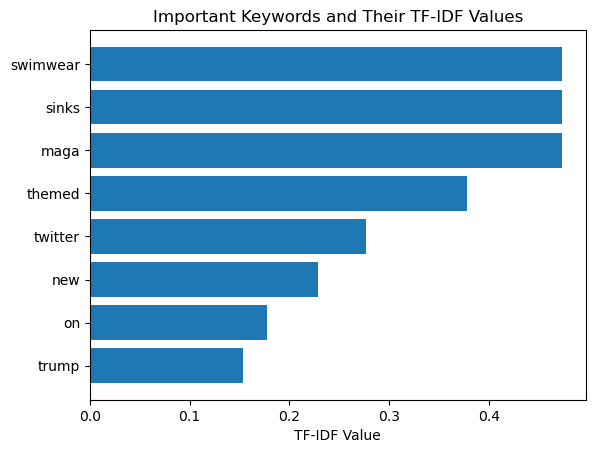

In [29]:
from matplotlib import pyplot as plt
keywords, tfidf_values = zip(*data)

# Generate the horizontal bar chart
plt.barh(keywords, tfidf_values)
plt.xlabel('TF-IDF Value')
plt.title('Important Keywords and Their TF-IDF Values')
plt.gca().invert_yaxis()  # Invert the y-axis to show keywords in descending order of importance
plt.show()